<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">P4 - Anticipez les besoins en consommation de bâtiments</h1>
    <p class="lead">La ville de Seattle souhaite atteindre la neutralité carbone en 2050, dans ce but il nous a été demandé de mettre au point un <a style="color:red">modèle de prédiction </a> des  <b>émissions de CO2 </b> et de la  <b>consommation totale d'énergie</b> de bâtiments non destinés à l’habitation / <b>bâtiments non-résidentiels</b> en se passant des relevés énergétiques, très coûteux à établir. Il nous a aussi été demandé d'étudier l'intérêt de l'<b>ENERGYSTAR Score</b> qui est aussi très difficile à calculer.</p>
      
      
   <a class="btn btn-primary btn-lg" href="https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv" role="button">Jeu de données</a>
  <hr class="my-4">
   
  </div>
</div>


Cette étude en deux notebooks vise à estimer (prédire) les émissions de CO2 et la consommation totale d’énergie de bâtiments de la ville de Seattle en exploitant leurs données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..) mises à disposition par la ville pour  l'année 2016.

L'étude est organisée en 2 notebooks:

- Notebook de nettoyage, feature engineering et analyse exploratoire
- Notebook de modélisations et prédictions

<p class="h1"; style="color:red">Modélisation Total Emission CO2</p>

La première partie nous a permis de réaliser un nettoyage du jeu de données initiale et une courte analyse exploratoire.

Dans cette seconde partie, nous allons réaliser les diverses modélisations grâce à des approches linéaires et non-linéaire afin de prédire les **émissions de CO2** et les **consommations d'énergie** des bâtiments.

**Etapes de la modélisation** : 
1. Selectionner un estimateur et préciser ses hyperparamètres : **model = LinearRegression (.............)**

2. Entrainer le model sur les données X,y (divisées en 2tableaux Numpy) : **model.fit ( X, y )**
    - X et y doivent avoir 02 dimensions :  **[ n_samples,  n_features ]**
    - Ne pas oublier de faire passer la dimension 1 sur le vecteur **y**
        
3. Evaluer le modèle : **model.score (X, y)**

4. Utiliser le modèle : **model.predict( X )**


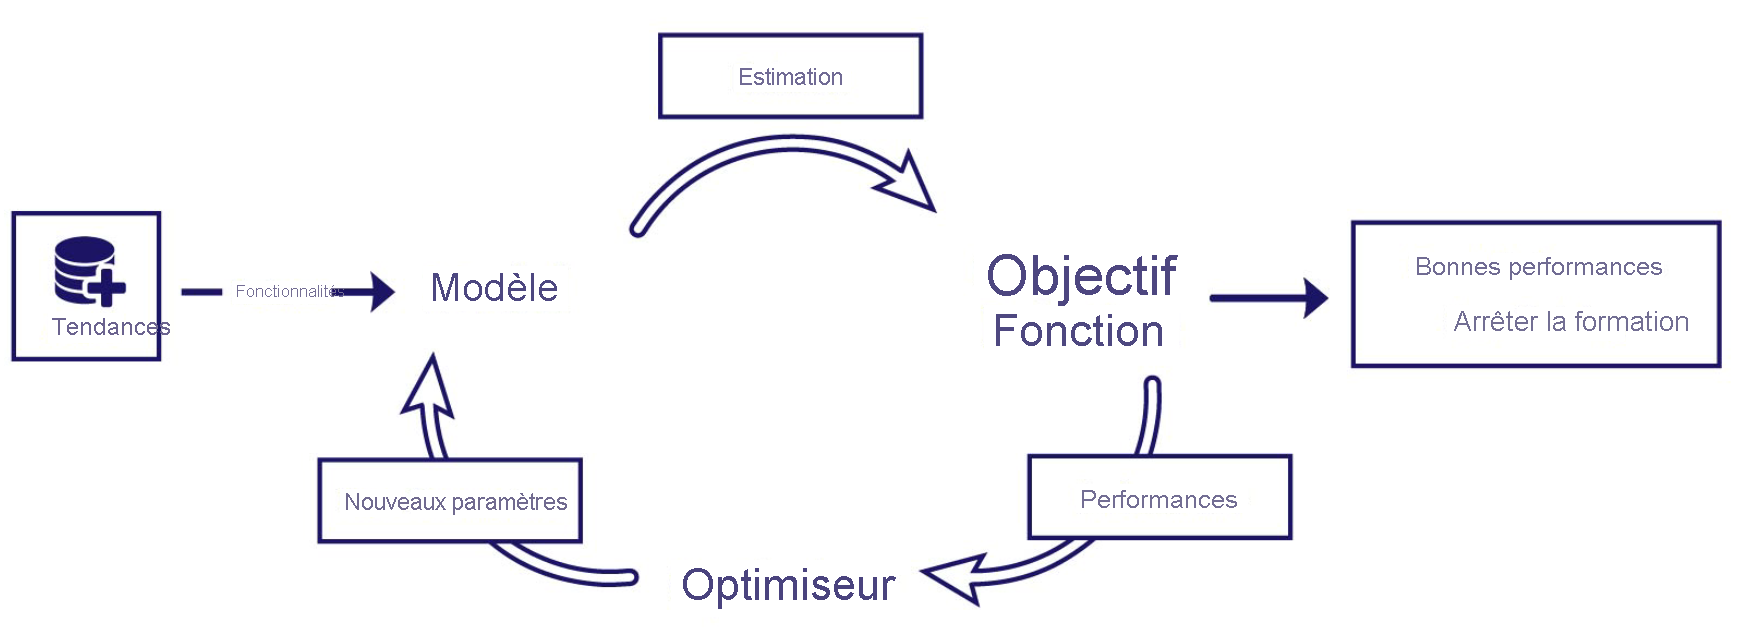

<p class="h2"; style="color:green">Mise en Place de l'environnement</p>

**Import des librairies à utiliser pour la modélisation**

In [11]:
# Import des librairies utiles à l'analyse exploratoire
# **Importation des librairies Python nécessaires**

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display
import os

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Affichage d'un maximum de les lignes et colonnes

pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)

In [14]:
import warnings
warnings.filterwarnings("ignore")

#Librairie standards pour manipulation et visualisations des données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time


#Librairie de Pre-processing (pré-traitement)
from sklearn.preprocessing import LabelEncoder


# Librairie pour modèles de machine learning avec scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Chargement du jeu de données**

In [18]:

# Données nettoyées et pré-traitées près pour la modélisation
data_cat = pd.read_csv("data_categoricale.csv", sep=",").iloc[:, 1:]

In [19]:
data = data_cat.copy()
print(data.shape)
data.head()

(1642, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,4.110874,7226362.5,249.98,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,4.127134,8387933.0,295.86,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,3.784190,72587024.0,2089.28,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,4.043051,6794584.0,286.43,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,4.330733,14172606.0,505.01,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


**Choix des critères d'évaluation**

Les métriques que nous allons utiliser pour l'évaluation de nos modèles sont les suivant :

- **R2** : coefficient de détermination
- **MAE** (Mean Absolute Error): l'erreur absolue moyenne
- **RMSE** : Root Mean Squared Error

In [9]:
def data_set_struture(df):
    
    type_of_variable = df.dtypes.value_counts()
    
    Nombre_variables_numeriques = type_of_variable[type_of_variable.index=='float64'][0]+\
                             type_of_variable[type_of_variable.index=='int64'][0]
    
    dict_structure = {"Nombre d'observations" :df.shape[0], "Nombre de variables" :int(df.shape[1]), 
                  'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                  'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                  'Pourcentage de données manquantes':int((df.isnull().sum()/len(df)*100).mean()),
                  'Nombre de doublons':int(len(df[df.duplicated()]))}
    
    structure_df = pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])

    return structure_df 

In [17]:
#data_set_struture(data_cleaned)

,Caractéristiques,Valeurs
0,Nombre d'observations,1642
1,Nombre de variables,27
2,Nombre de variables catégorielles,5
3,Nombre de variables numériques,22
4,Pourcentage de données manquantes,1
5,Nombre de doublons,0


In [16]:
#data.select_dtypes(include=["float64","int64"]).columns
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')

### Données avec ENERGYSTARScore Clean

In [20]:
# Cleaning Nan values on the energy_starscore column
data_energy_score = data_cat.copy()
data_energy_score = data_energy_score.dropna(axis=0, how='any', inplace=False)

print("Dataset Shape with ENERGYSTARScore ", data_energy_score.shape)
data_energy_score.head()

Dataset Shape with ENERGYSTARScore  (1088, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,4.110874,7226362.5,249.98,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,4.127134,8387933.0,295.86,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,3.784190,72587024.0,2089.28,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,4.043051,6794584.0,286.43,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,4.330733,14172606.0,505.01,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


## Modélisation 

<p class="h2"; style="color:green">1 - Linear Regression Model </p>

Notre jeu de données initial de taille (1642, 17) a été séparer en deux : 
  - Un Train set de taille => (1149, 17)
  - Un Test set de taille => (493, 17)
               --------------------------------------------------------------------------------



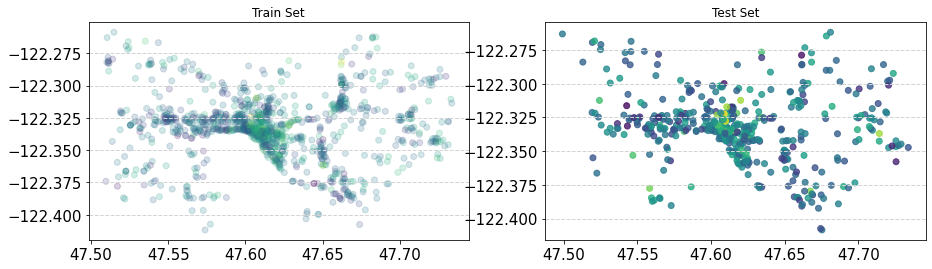

In [91]:
#Import des librairie nécessaire au pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import numpy as np

# Import Data

# Modélisation avec energyStarscore
#df = data_energy_score

# Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())


# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features))



# Diviser le jeu de données en deux
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=104)

print(f"Notre jeu de données initial de taille {X_data.shape} a été séparer en deux : ")
print('  - Un Train set de taille =>', X_train.shape)
print('  - Un Test set de taille =>', X_test.shape)
print("               --------------------------------------------------------------------------------\n")


import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train.values[:, 3], X_train.values[:, 4], c=y_train, alpha=0.2)
plt.title('Train Set')

plt.subplot(1, 2, 2)
plt.scatter(X_test.values[:, 3], X_test.values[:, 4], c=y_test, alpha=0.8)
plt.title('Test Set')
plt.show()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline

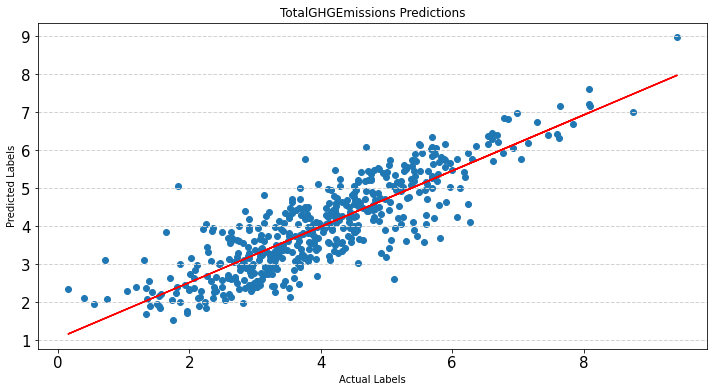

In [92]:
# Entrainement et évaluation d'un modèle de regression linéaaire

from sklearn.linear_model import LinearRegression

#creation du modèle de regression linéaire
Lin_reg_model = make_pipeline(preprocessor, LinearRegression())
Lin_reg_model.fit(X_train, y_train)
print(Lin_reg_model)
print("--------------------------------------------------------------------------------\n")

print("Linear Regresion Model Evaluation ")
print("  - Train score:", Lin_reg_model.score(X_train, y_train))
print("  - Test score:", Lin_reg_model.score(X_test, y_test))
print()


# Predictions and  evaluation metrics 
# Get predictions
y_pred = Lin_reg_model.predict(X_test)

from sklearn import metrics
# Display metrics
print("Lin_Reg. Display Metrics\n")
print("  - MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("  - MSR :", metrics.mean_squared_error(y_test, y_pred))
print("  - RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("  - R2 :", metrics.explained_variance_score(y_test, y_pred))


# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + ' Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

**Coefficients Analysis - coef_**

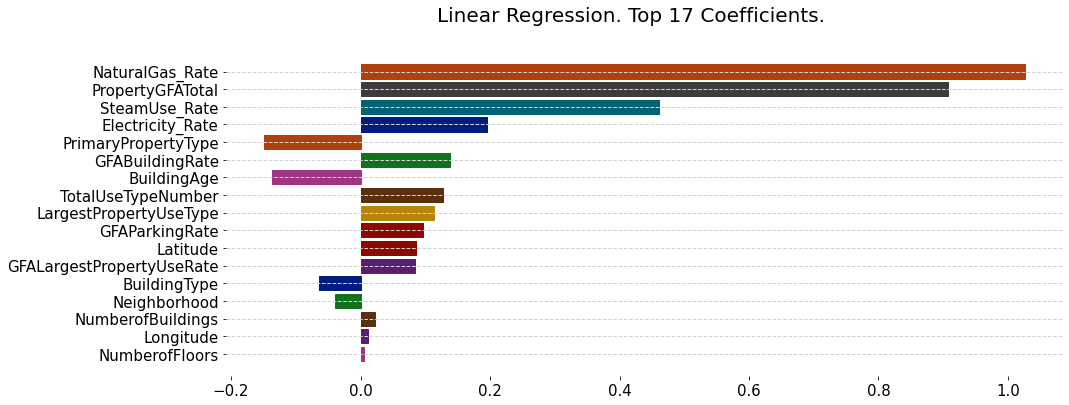

In [93]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

linear_reg_coeff = Lin_reg_model[1].coef_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", 
                        fontsize=20, fontweight="normal")

**Error Analysis**

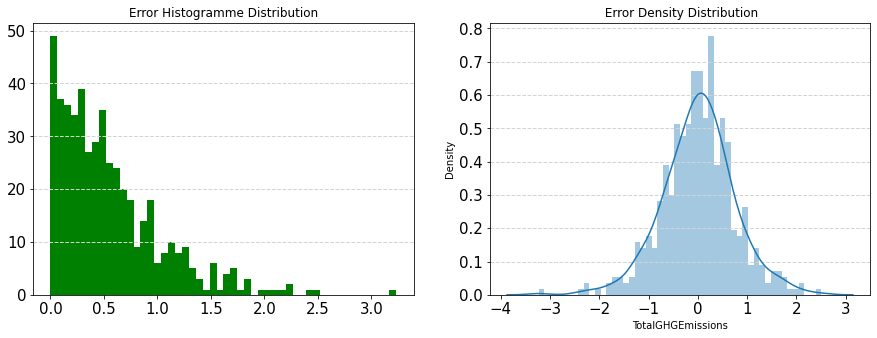

In [94]:
import seaborn as sns

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (15,5))

# calcul du cout (error)
error_hist = np.abs(y_test - y_pred)


# Create a Histogramme on the first axis
ax[0].hist(error_hist, bins=50, color='green')
ax[0].set_title('Error Histogramme Distribution')

# Create a Boxplot of our var on the second axis
#ax[1].boxplot(var_data)
sns.distplot((y_test - y_pred),  bins = 50)
ax[1].set_title(" Error Density Distribution")

plt.show()

[]

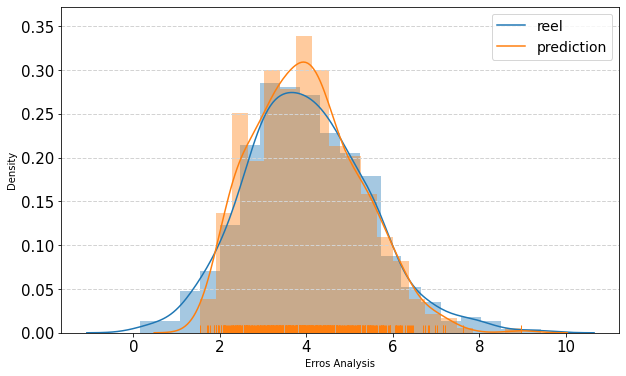

In [95]:
plt.figure(figsize=(10,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.xlabel("Erros Analysis")
plt.legend(['reel', 'prediction'])
plt.plot()

<p class="h2"; style="color:green"> 2 - Gradient Boosting Model </p>

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object'))])),
                ('regressor', GradientBoostingRegressor())]) 

MAE : 0.49707057955115125
MSR : 0.4218232051155157
RSME : 0.649

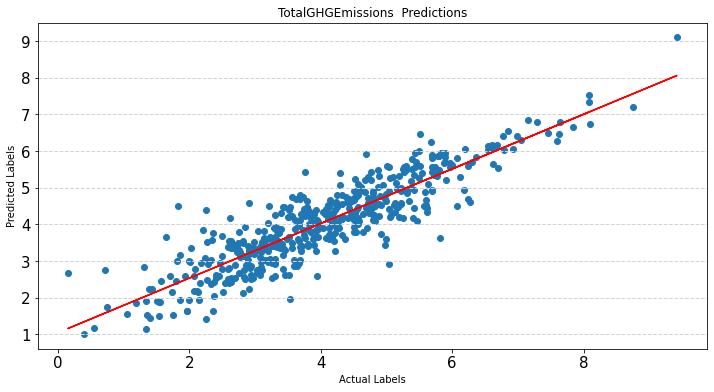

In [96]:
# Entrainement et évaluation d'un modèle de Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor


# Import Data

# - Modélisation avec energyStarscore
#df = data_energy_score

# - Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())


# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      )



# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
y_pred = model.predict(X_test)


# Display metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSR :", metrics.mean_squared_error(y_test, y_pred))
print("RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 :", metrics.explained_variance_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + '  Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

<p class="h2"; style="color:green"> 3 - Random Forest Model </p>

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())]) 

MAE : 0.5223315443722547
MSR : 0.48207023779168723
RSME : 0.6943127

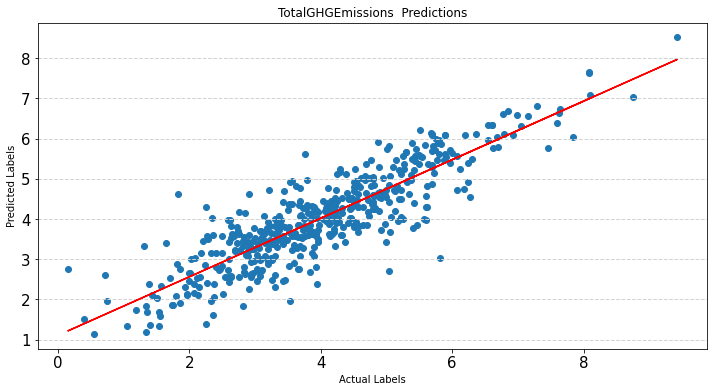

In [97]:
# Entrainement et évaluation d'un modèle de Random Forest
from sklearn.ensemble import RandomForestRegressor


# Import Data

# Modélisation avec energyStarscore
#df = data_energy_score

# Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)

# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())


# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       )


# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
y_pred = model.predict(X_test)


# Display metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSR :", metrics.mean_squared_error(y_test, y_pred))
print("RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 :", metrics.explained_variance_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + '  Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

<p class="h2"; style="color:green">Améliorer des modèles Ensemblistes avec l'Optimisattiondes hyperparamètres </p>

Les modèles simples avec de petits jeux de données peuvent souvent être traités en une seule étape, tandis que les jeux de données plus grands et les modèles plus complexes doivent être ajustés en utilisant à plusieurs reprises le modèle avec les données d’apprentissage et en comparant le résultat à l’étiquette attendue. Si la prédiction est suffisamment précise, nous considérons que le modèle est entraîné. Si ce n’est pas le cas, nous ajustons légèrement le modèle et nous repartons dans la boucle.

- GradientBoostingRegressor

- RandomForestRegressor

- Adaboost

<p class="h3"; style="color:red">Optimisattion Gradient Boosting </p>

skleadoc : https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

interesting doc : https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-quantile-py

In [98]:
# Use a Gradient Boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score


# Target and Features definition 
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]

# Split data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=13)


# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()



# Try these hyperparameter values - -  Fixer les valeurs des hyperparamètres à tester
params = {
    'learning_rate': [0, 0.01, 0.1, 1],
    'n_estimators' : [50, 100, 200],
    'max_depth' : [2, 4, 6],   
    "min_samples_split": [2, 10, 20],
 }


# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 200} 

GradientBoostingRegressor(max_depth=4, min_samples_split=20, n_estimators=200) 



<p class="h3"; style="color:red">Optimisattion Random Forest </p>

In [45]:
# Loading data
X_data = df[features_cols]
y_data = df[y_col]

# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=13)

**Parameters Optmisation - Algo. Random Forest**

In [42]:
# Use a Gradient Boosting algorithm
alg = RandomForestRegressor()


# Try these hyperparameter values - -  Fixer les valeurs des hyperparamètres à tester
params = {
 'n_estimators' : [2, 5, 10, 20, 50],
 'min_samples_split' : [2, 10, 20],
 'min_samples_leaf' : [2, 10, 20],
 'max_depth' : [2, 4, 6, 8, 10, 15, 20, 50],
 'bootstrap' : [True, False]
 }



# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} 

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=50) 



<p class="h2"; style="color:green">Modèle Final Optimisé </p>

## Plot individual and voting regression predictions

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. We will use three different regressors to predict the data: GradientBoostingRegressor, RandomForestRegressor, and LinearRegression). Then the above 3 regressors will be used for the VotingRegressor.

Finally, we will plot the predictions made by all models for comparison.

**Model Documentation** : https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html

In [210]:
print(data_cat.shape)
data_cat.head()

(1642, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.526589,1.271150,2.516892,8,1.631370,7226362.5,249.98,0.218933,0.54606,0.17664,0.526589,0.000000,0.526589,0.526589,89
1,1,2,3,47.61317,-122.33393,0.526589,1.248441,2.529559,8,1.634547,8387933.0,295.86,0.000000,0.38661,0.61339,0.480970,0.127335,0.465796,0.869742,20
2,1,2,3,47.61393,-122.33810,0.526589,1.555545,2.692641,8,1.565317,72587024.0,2089.28,0.231222,0.68231,0.02058,0.460324,0.171515,0.459257,0.526589,47
3,1,2,3,47.61412,-122.33664,0.526589,1.223156,2.486894,8,1.618011,6794584.0,286.43,0.248499,0.40752,0.26657,0.526589,0.000000,0.526589,0.526589,90
4,1,2,3,47.61375,-122.34047,0.526589,1.372307,2.570767,8,1.673489,14172606.0,505.01,0.000000,0.37880,0.62120,0.404720,0.264219,0.426856,0.869742,36


Voting Regression Model  Metrics : 
  - MAE : 0.4773
  - MSE : 0.4030
  - RMSE: 0.6348
  - R2: 0.800


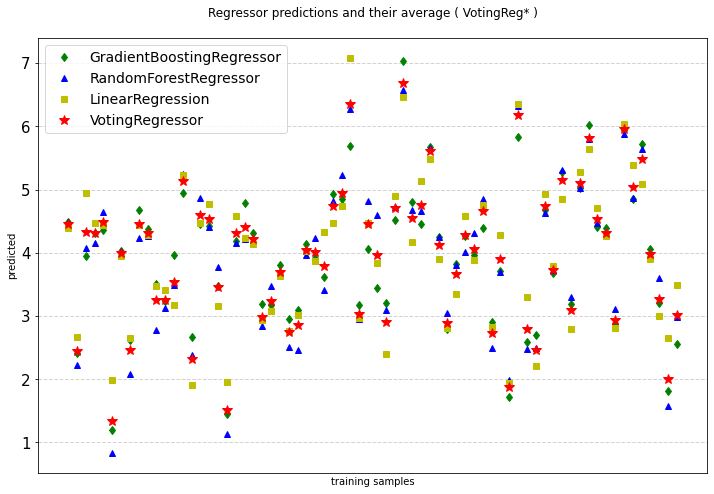

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error


# Import Data
df = data_cat.copy()
df.drop('ENERGYSTARScore', axis=1, inplace=True)

#data_energy_score.dropna(axis=0, how='any', inplace=False)
#df = data_energy_score.copy()


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]

    
# Loading data
X_data = df[features_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=13)


# Training classifiers
reg1 = RandomForestRegressor(n_estimators=50,
                            max_depth=20,                            
                            min_samples_leaf=2,
                            min_samples_split=10,
                            bootstrap = True,
                            random_state=1, 
                            verbose=False)

reg2 = GradientBoostingRegressor(n_estimators =100,
                                 learning_rate = 0.2,
                                 max_depth=2,
                                 min_samples_split=2,
                                 random_state=1,
                                 loss = "squared_error")


reg3 = LinearRegression()


# Model Training
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

Voting_Reg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
Voting_Reg.fit(X_train, y_train)


# Evaluate the model using the test data
y_pred = Voting_Reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

reel_mae = np.exp(mae)
reel_rmse = np.exp(mse)


print("Voting Regression Model  Metrics : ")
print("  - MAE : {:.4f}".format(mae))
print("  - MSE : {:.4f}".format(mse))
print("  - RMSE: {:.4f}".format(rmse))
print("  - R2: {:.3f}".format(r2))

#print("\n")
#print("L'error moyenne absolue effectué par notre modèle est de : {:.3f}".format(reel_mae))

# sample data
xt = X_test[:70]

# Plotting Predictions
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = Voting_Reg.predict(xt)

plt.figure(figsize=(12, 8))
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average ( VotingReg* )\n")

plt.show()

In [67]:
print("Min target: ", y_train.min())
print("Max target: ", y_train.max())
print("Median target: ", y_train.median())   
print("Mean target: ", y_train.mean())            

Min target:  0.11332868530700317
Max target:  9.2813178062484
Median target:  3.9448773422990935
Mean target:  4.015822693943678


In [50]:
Voting_Reg.estimators_

[RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=1, verbose=False),
 GradientBoostingRegressor(learning_rate=0.3, max_depth=2, random_state=1),
 LinearRegression()]

### Coefficients Analysis

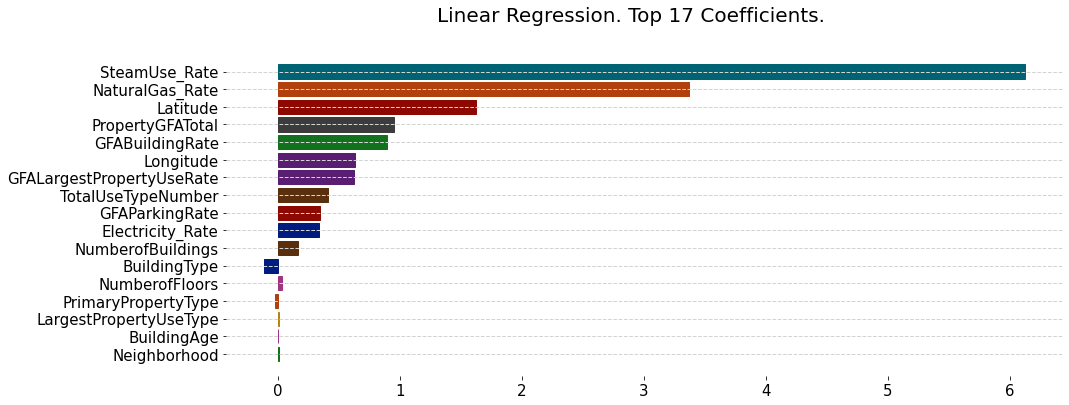

In [68]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

linear_reg_coeff = reg3.coef_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", 
                        fontsize=20, fontweight="normal")

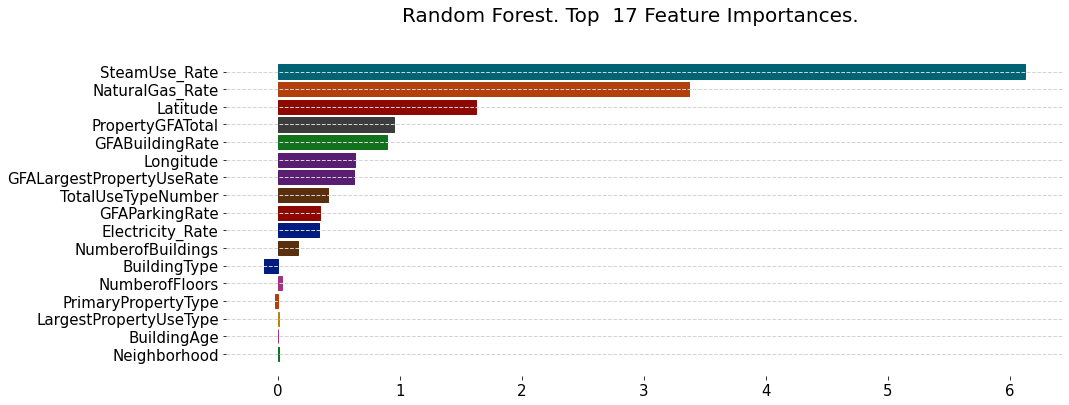

In [69]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

rf_features = reg1.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Random Forest. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")

In [301]:
# len(X_data.columns)

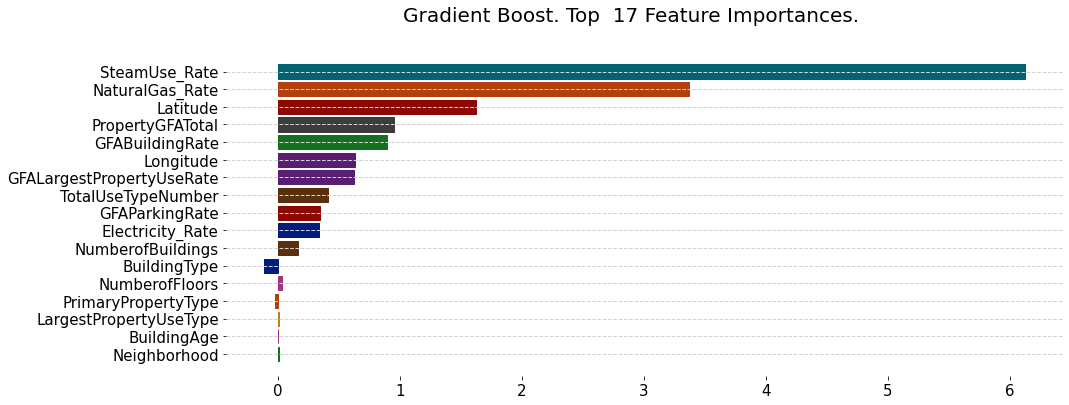

In [70]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

gb_features = reg2.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Gradient Boost. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")

In [71]:
df.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,15.793246,5.525373,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,15.942305,5.693261,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,18.100297,7.645053,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,15.731637,5.660979,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,16.466822,6.226556,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


## <font color='purple'>Analyse des erreurs de pred. selon les classes des variables catégorielles </font>

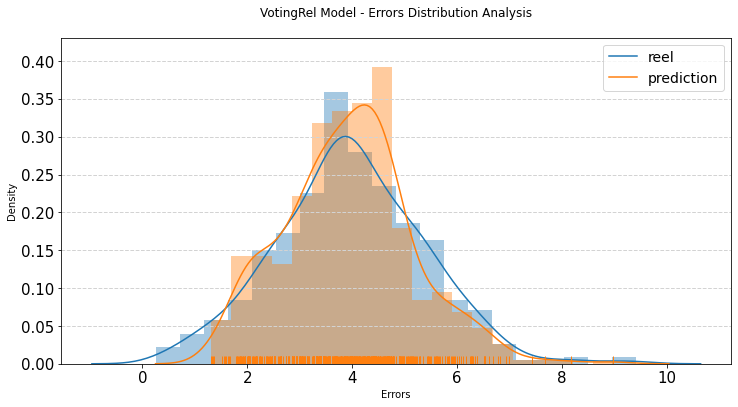

In [72]:
# Error Analysis

y_pred = Voting_Reg.predict(X_test)

plt.figure(figsize=(12,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.title ("VotingRel Model - Errors Distribution Analysis\n")
plt.xlabel("Errors")
plt.legend(['reel', 'prediction'])
plt.show()

In [73]:
print("X_test_Cols : ", X_test.columns)
print("\n")
print("Shape Test set :", X_test.shape)
X_test.head(5)

X_test_Cols :  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')


Shape Test set : (493, 17)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22


In [226]:
#X_test.drop(columns=["y_pred_log", "y_real_log"], axis=1, inplace=True)

### Modèle Voting Regressor

In [74]:
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22


In [ ]:
#train_set["SalePrice"] = np.exp(y).

In [75]:
df_test["y_pred_log"] = Voting_Reg.predict(X_test)
df_test["y_real_log"] = y_test

In [76]:
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87,4.457279,5.227519
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28,2.440083,2.691243
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87,4.320835,3.954124
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15,4.315699,4.711061
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22,4.483252,5.189339


In [77]:
df_test["y_real"] = np.exp(df_test["y_real_log"])
df_test["y_pred"] = np.exp(df_test["y_pred_log"])
df_test["errors"] = df_test['y_real'] - df_test['y_pred']
df_test["abs_errors"] = abs(df_test['y_real'] - df_test['y_pred'])

In [78]:
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87,4.457279,5.227519,186.33,86.252480,100.077520,100.077520
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28,2.440083,2.691243,14.75,11.473996,3.276004,3.276004
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87,4.320835,3.954124,52.15,75.251413,-23.101413,23.101413
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15,4.315699,4.711061,111.17,74.865962,36.304038,36.304038
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22,4.483252,5.189339,179.35,88.522106,90.827894,90.827894


In [79]:
print("Min target: ", df_test["y_pred"].min())
print("Max target: ", df_test["y_pred"].max())
print("Median target: ", df_test["y_pred"].median())   
print("Mean target: ", df_test["y_pred"].mean())  

Min target:  3.735559901044649
Max target:  7939.441050721446
Median target:  52.643102348233455
Mean target:  129.02229502710685


In [81]:
df_test_format = df_test.copy()
col_to_format = ['y_real', 'y_pred', "errors"]

# .applymap("{0:.2f}".format)
df_test_format[col_to_format] = df_test_format[col_to_format].applymap("{:,.0f}".format)
df_test_format.sort_values(by="abs_errors", ascending=True).head(10)

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
709,1,2,9,47.66023,-122.31581,0.693147,1.386294,9.931686,8,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,86,1.789034,1.790091,6,6,0,0.006333
927,1,10,11,47.56028,-122.28914,0.693147,1.098612,10.015253,11,0.0,0.34687,0.65313,0.693147,0.0,0.693147,1.098612,54,4.015441,4.015301,55,55,-0,0.007761
962,1,17,7,47.63981,-122.39907,0.693147,1.386294,10.082094,18,0.0,0.77631,0.22369,0.693147,0.0,0.607845,1.098612,89,2.777315,2.779440,16,16,0,0.034202
1150,1,14,5,47.57667,-122.32542,0.693147,1.098612,10.085851,34,0.0,0.47832,0.52168,0.693147,0.0,0.666546,1.098612,65,3.732443,3.736240,42,42,0,0.158928
997,1,17,7,47.65504,-122.37402,0.693147,1.098612,9.904637,18,0.0,1.00000,0.00000,0.693147,0.0,0.711998,0.693147,55,1.681961,1.719189,6,5,0,0.203912
979,1,20,0,47.66411,-122.37185,0.693147,0.693147,10.592652,17,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,36,1.866742,1.830980,6,6,-0,0.227190
1337,1,17,4,47.61459,-122.31724,0.693147,1.386294,10.332702,18,0.0,0.72174,0.27826,0.693147,0.0,0.676738,1.098612,99,3.267758,3.278276,27,26,0,0.277580
1359,1,8,9,47.66816,-122.27706,0.693147,0.693147,10.033594,34,0.0,0.09081,0.90919,0.693147,0.0,0.657758,1.791759,68,4.800343,4.802873,122,122,0,0.307914
1632,2,9,7,47.63572,-122.37525,0.693147,0.693147,9.522374,18,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,64,1.572269,1.504077,4,5,-0,0.317566
1092,1,20,7,47.65649,-122.37507,0.693147,0.693147,10.757286,17,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,68,2.022668,1.968510,7,8,-0,0.398467


In [82]:
df_test_format.sort_values(by="abs_errors", ascending=True).tail(10)

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
522,1,10,9,47.655290,-122.321330,0.693147,1.945910,11.873672,19,0.000000,0.55013,0.44987,0.693147,0.000000,0.606276,1.098612,10,5.679617,6.567656,712,293,419,418.862707
177,1,7,7,47.619720,-122.360330,0.693147,1.791759,12.154785,14,0.000000,0.65244,0.34756,0.584860,0.186695,0.572289,1.098612,89,5.479439,6.495326,662,240,422,422.327710
408,1,13,3,47.606130,-122.341150,0.693147,0.693147,10.685767,33,0.000000,0.00000,1.00000,0.693147,0.000000,0.693147,0.693147,116,4.904765,6.417043,612,135,477,477.258806
147,1,10,5,47.590850,-122.333540,0.693147,1.386294,13.974331,21,0.000000,0.69131,0.30869,0.693147,0.000000,0.693147,0.693147,17,6.545718,7.128937,"1,248",696,551,551.293451
178,1,2,3,47.612400,-122.350750,0.693147,1.609438,11.714314,8,0.000000,0.24839,0.75161,0.693147,0.000000,0.693147,0.693147,55,5.765019,6.967090,"1,061",319,742,742.184823
2,1,2,3,47.613930,-122.338100,0.693147,3.737670,13.770629,8,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47,6.775619,7.645053,"2,090",876,"1,214",1214.058565
964,0,19,4,47.610650,-122.317110,0.693147,1.098612,14.603968,2,0.000000,0.53793,0.46207,0.693147,0.000000,0.577546,1.098612,77,7.441779,8.084710,"3,244","1,706","1,539",1538.697892
1299,0,19,7,47.650190,-122.361730,2.708050,1.098612,13.193755,2,0.000000,0.24963,0.75037,0.693147,0.000000,0.690188,0.693147,71,7.672569,8.234740,"3,770","2,149","1,621",1621.066459
593,1,1,4,47.608951,-122.322402,2.079442,2.708050,14.384211,7,0.380318,0.47787,0.05938,0.693147,0.000000,0.656634,1.098612,22,8.979598,9.418018,"12,308","7,939","4,369",4368.718949
116,1,1,9,47.662310,-122.281460,1.945910,2.397895,13.686541,7,0.000000,0.45558,0.54442,0.693147,0.000000,0.693147,0.693147,63,8.170768,9.005346,"8,147","3,536","4,610",4610.460664


In [83]:
df_test_format[["PrimaryPropertyType", "Neighborhood" , "BuildingAge","y_real", "y_pred", "errors"]].head()

,PrimaryPropertyType,Neighborhood,BuildingAge,y_real,y_pred,errors
1408,17,3,87,186,86,100
934,3,2,28,15,11,3
1278,21,0,87,52,75,-23
809,8,6,15,111,75,36
1132,10,5,22,179,89,91


In [84]:
describe = df_test.describe().T
col_syle = ['count', 'mean', 'min', 'max',  'std', '25%', '50%', '75%']

# .applymap("{0:.2f}".format)
describe[col_syle] = describe[col_syle].applymap("{:,.0f}".format)
describe.tail(4)

,count,mean,std,min,25%,50%,75%,max
y_real,493,174,718,1,21,51,130,"12,308"
y_pred,493,129,429,4,22,53,107,"7,939"
errors,493,45,320,-351,-12,1,26,"4,610"
abs_errors,493,75,314,0,5,17,48,"4,610"


#### <font color='darkcyan'>Building Type</font>

In [85]:
df_test['BuildingType'].value_counts()

1    434
3     28
2     25
0      6
Name: BuildingType, dtype: int64

In [86]:
df_buildingType = df_test[['BuildingType', 'errors']].groupby('BuildingType').mean()
df_buildingType

,errors
BuildingType,
0,618.210179
1,40.760724
2,54.329332
3,-15.871427


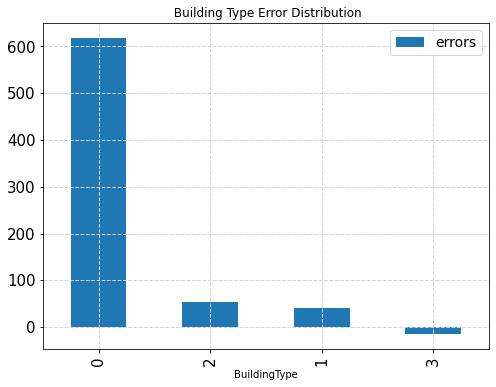

In [87]:
#fig, ax = plt.subplots(figsize=(10, 7))

df_buildingType.sort_values('errors',ascending=False).plot(figsize=(8, 6), kind='bar')
plt.title(" Building Type Error Distribution")
plt.show()

#### <font color='darkcyan'>Primary Property Type</font>

In [88]:
df_property_type = df_test[['PrimaryPropertyType', 'errors']].groupby('PrimaryPropertyType').mean()
df_property_type.sort_values('errors',ascending=False)
df_property_type

,errors
PrimaryPropertyType,
0,0.044075
1,2329.684231
2,83.860140
3,-9.936201
4,195.914575
5,-0.309424
6,-102.225509
7,99.940202
8,24.002405


[]

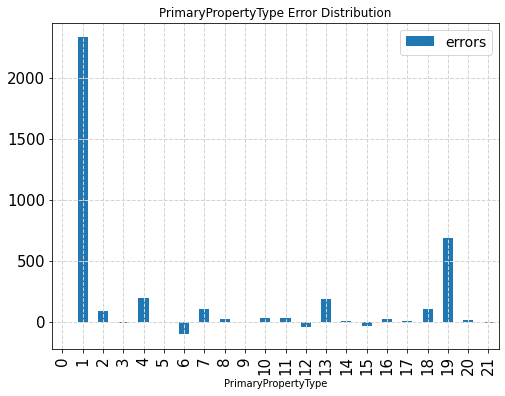

In [89]:
df_property_type.plot(figsize=(8, 6), kind='bar')
plt.title("PrimaryPropertyType Error Distribution")
plt.plot()

#### <font color='darkcyan'>Primary Property Type</font>

[]

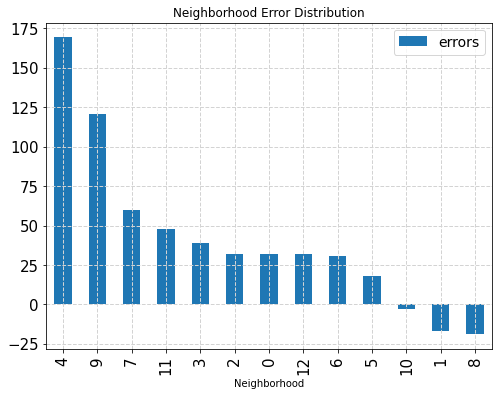

In [90]:
df_neighborhood = df_test[['Neighborhood', 'errors']].groupby('Neighborhood').mean()

df_neighborhood.sort_values('errors',ascending=False).plot(figsize=(8, 6), kind='bar')
plt.title("Neighborhood Error Distribution")
plt.plot()